In [75]:
#  simpleClassifier.py
#  G. Cowan / RHUL Physics / November 2020
#  Simple program to illustrate classification with scikit-learn

import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [76]:
#  read the data in from files, 
#  assign target values 1 for signal, 0 for background
sigData = np.loadtxt('signal.txt')
nSig = sigData.shape[0]
sigTargets = np.ones(nSig)

bkgData = np.loadtxt('background.txt')
nBkg = bkgData.shape[0]
bkgTargets = np.zeros(nBkg)

In [77]:
# concatenate arrays into data X and targets y
X = np.concatenate((sigData,bkgData),0)
#X = X[:,0:2]                       # at first, only use x1 and x2
y = np.concatenate((sigTargets, bkgTargets))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Create classifier object and train
# Add code here to include other classifiers (MLP, BDT,...)
#clf = LDA()
#clf = MLP(hidden_layer_sizes=3)

clf = AdaBoost(n_estimators=200)
clf.fit(X_train, y_train)

# Evaluate accuracy using the test data.
# If available, use the decision function, else (e.g. for MLP) use predict_proba
# Adjust threshold value tCut or pMin as appropriate

X_bkg_test = X_test[y_test==0]
X_sig_test = X_test[y_test==1]
y_bkg_test = y_test[y_test==0]
y_sig_test = y_test[y_test==1]
#print((X_bkg_test), (X_bkg_test))
if hasattr(clf, "decision_function"):
    tCut = 0.
    y_bkg_pred = (clf.decision_function(X_bkg_test) >= tCut).astype(bool)
    y_sig_pred = (clf.decision_function(X_sig_test) >= tCut).astype(bool)
else:
    pMin = 0.9
    y_bkg_pred = (clf.predict_proba(X_bkg_test)[:,1]  >= pMin).astype(bool)
    y_sig_pred = (clf.predict_proba(X_sig_test)[:,1]  >= pMin).astype(bool)

power = metrics.accuracy_score(y_sig_test, y_sig_pred)        # = = Prob(t >= tCut|sig)
print('power of test with respect to signal = ', power)

power of test with respect to signal =  0.8902047370533922


In [78]:
#  Add code here to obtain the background efficiency
# = size of test alpha = = Prob(t >= tCut|bkg)

#************************ Question 1a *****************************

size = 1 - metrics.accuracy_score(y_bkg_test, y_bkg_pred)
print('size of test with respect to bkg = ', size)

size of test with respect to bkg =  0.08110801115982458


In [79]:
#************************ Question 1b *****************************

# Using Bayes Theorem P(s|t>tc) = P(t>tc|s) pi(s)/(P(t>tc|s) pi(s) + P(t>tc|b)pi(b)
# Since prior probabilities are the same, they cancel out.
purity = power/(power + size)
print("purity: ", purity)

purity:  0.9164965029965608


In [80]:
# make a scatter plot
""""
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
ax.set_xlim((-2.5,3.5))
ax.set_ylim((-2,4))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))       # make square plot
xtick_spacing = 0.5
ytick_spacing = 2.0
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
#plt.scatter(sigData[:,0], sigData[:,1], s=3, color='dodgerblue', marker='o')
#plt.scatter(bkgData[:,0], bkgData[:,1], s=3, color='red', marker='o')

# add decision boundary to scatter plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01  # step size in the mesh
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# depending on classifier call predict_proba or decision_function
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
#plt.contour(xx, yy, Z, 1, colors='k')
plt.xlabel(r'$x_{1}$', labelpad=0)
plt.ylabel(r'$x_{2}$', labelpad=15)
plt.savefig("scatterplot.pdf", format='pdf') 
"""

'"\nfig, ax = plt.subplots(1,1)\nplt.gcf().subplots_adjust(bottom=0.15)\nplt.gcf().subplots_adjust(left=0.15)\nax.set_xlim((-2.5,3.5))\nax.set_ylim((-2,4))\nx0,x1 = ax.get_xlim()\ny0,y1 = ax.get_ylim()\nax.set_aspect(abs(x1-x0)/abs(y1-y0))       # make square plot\nxtick_spacing = 0.5\nytick_spacing = 2.0\nax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))\nax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))\n#plt.scatter(sigData[:,0], sigData[:,1], s=3, color=\'dodgerblue\', marker=\'o\')\n#plt.scatter(bkgData[:,0], bkgData[:,1], s=3, color=\'red\', marker=\'o\')\n\n# add decision boundary to scatter plot\nx_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5\ny_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5\nh = .01  # step size in the mesh\n#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))\n# depending on classifier call predict_proba or decision_function\nZ = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]\nZ = Z.

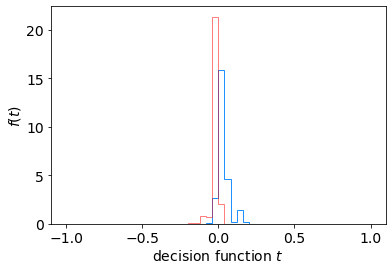

In [81]:
# make histogram of decision function
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(X_test)[:,1]
if hasattr(clf, "decision_function"):
    tTest = clf.decision_function(X_test)        # if available use decision_function
else:
    tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 50
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
plt.xlabel('decision function $t$', labelpad=3)
plt.ylabel('$f(t)$', labelpad=3)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color='dodgerblue')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False, color='red', alpha=0.5)
plt.savefig("decision_function_hist.pdf", format='pdf')

plt.show()

In [57]:
from sklearn.ensemble import AdaBoostClassifier